In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

attributes.csv              test.csv
product_descriptions.csv    train.csv
relevance_instructions.docx week1.ipynb
sample_submission.csv


In [3]:
!head -5 train.csv

"id","product_uid","product_title","search_term","relevance"
2,100001,"Simpson Strong-Tie 12-Gauge Angle","angle bracket",3
3,100001,"Simpson Strong-Tie 12-Gauge Angle","l bracket",2.5
9,100002,"BEHR Premium Textured DeckOver 1-gal. #SC-141 Tugboat Wood and Concrete Coating","deck over",3
16,100005,"Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included)","rain shower head",2.33


In [4]:
!head -5 test.csv

"id","product_uid","product_title","search_term"
1,100001,"Simpson Strong-Tie 12-Gauge Angle","90 degree bracket"
4,100001,"Simpson Strong-Tie 12-Gauge Angle","metal l brackets"
5,100001,"Simpson Strong-Tie 12-Gauge Angle","simpson sku able"
6,100001,"Simpson Strong-Tie 12-Gauge Angle","simpson strong  ties"


In [5]:
!head -5 product_descriptions.csv

"product_uid","product_description"
100001,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
100002,"BEHR Premium Textured DECKOVER is an innovative solid color coating. It will bring your old, weat

In [2]:
traindf=pd.read_csv('train.csv')
print traindf.size
traindf.head(5)


370335


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [3]:
testdf=pd.read_csv('test.csv')
print testdf.size
testdf.head(5)

666772


,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [4]:
prod_desc=pd.read_csv('product_descriptions.csv')
print prod_desc.size
prod_desc.head(3)

248856


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...


In [5]:
#  step1，join train data and product description
train_prod=pd.merge(traindf,prod_desc,on='product_uid')
train_prod=train_prod[['product_uid','product_title','search_term','product_description','relevance']]
print train_prod.size
train_prod.head(5)

370335


,product_uid,product_title,search_term,product_description,relevance
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,"Not only do angles make joints stronger, they ...",3.00
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,"Not only do angles make joints stronger, they ...",2.50
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,BEHR Premium Textured DECKOVER is an innovativ...,3.00
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,Update your bathroom with the Delta Vero Singl...,2.33
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,Update your bathroom with the Delta Vero Singl...,2.67


In [6]:
# join test data and product description
test_prod=pd.merge(testdf,prod_desc, on='product_uid')
test_prod=test_prod[['product_uid','product_title','search_term','product_description']]
print test_prod.size
test_prod.head(15)

666772


,product_uid,product_title,search_term,product_description
0,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,"Not only do angles make joints stronger, they ..."
1,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,"Not only do angles make joints stronger, they ..."
2,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,"Not only do angles make joints stronger, they ..."
3,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties,"Not only do angles make joints stronger, they ..."
4,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668,"Not only do angles make joints stronger, they ..."
5,100001,Simpson Strong-Tie 12-Gauge Angle,wood connectors,"Not only do angles make joints stronger, they ..."
6,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath and shower kit,Classic architecture meets contemporary design...
7,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath drain kit,Classic architecture meets contemporary design...
8,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,one piece tub shower,Classic architecture meets contemporary design...
9,100004,Grape Solar 265-Watt Polycrystalline Solar Pan...,solar panel,The Grape Solar 265-Watt Polycrystalline PV So...


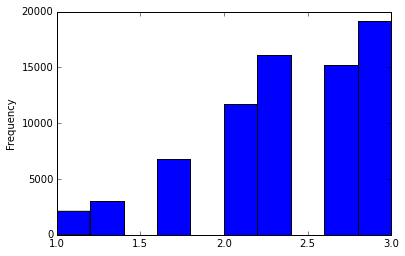

In [7]:
train_prod['relevance'].plot.hist(bins=10)

In [8]:
# step2，remove common words from product_description using stopwords
from nltk.corpus import stopwords
sw=stopwords.words('english')
custom_stopwords = ["also", "allows", "use", "using", "used", "sold", "includes", "help", "helps", "features", "great", "easy", 
                    "1", "2", "3", "4", "5", "6", "10", "may", "look", "included", "quality", "limited", "perfect", "ideal", 
                    "need", "offers", "easily", "vary", "variety", "finish", "style", "one", "two", "available", "create", 
                    "applications", "comes", "technology", "make", "makes", "made", "products", "design", "performance", "install",
                   "two", "keep", "work", "works", "less", "material", "add", "adds", "added", "provide", "provides", 
                    "life", "set",'in.','x','ft.','-','per','12','new','w','for','in','x','and','inch','with','in.','to','ft','sq.']
sw.extend(custom_stopwords)
print sw,len(sw)

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [22]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
prod_desc_words=train_prod['product_description'].str.lower().str.split()


In [10]:
prod_desc_words[:5]

0    [not, only, do, angles, make, joints, stronger...
1    [not, only, do, angles, make, joints, stronger...
2    [behr, premium, textured, deckover, is, an, in...
3    [update, your, bathroom, with, the, delta, ver...
4    [update, your, bathroom, with, the, delta, ver...
dtype: object

In [11]:
#when add new stopwords,please run this line update
prod_desc_words_rmsw=prod_desc_words.apply(lambda x: [item for item in x if item not in sw])

In [12]:
prod_desc_words_rmsw[:5]

0    [angles, joints, stronger,, consistent,, strai...
1    [angles, joints, stronger,, consistent,, strai...
2    [behr, premium, textured, deckover, innovative...
3    [update, bathroom, delta, vero, single-handle,...
4    [update, bathroom, delta, vero, single-handle,...
dtype: object

In [13]:
#check description words
prod_desc_list=[]
for item in prod_desc_words_rmsw:
    prod_desc_list.extend(item)
len(prod_desc_list)

6114367

In [14]:
from collections import Counter
cnt=Counter()
for item in prod_desc_list:
    cnt[item]+=1

In [15]:
# top 100 most common words appear in description
most_describe_words=cnt.most_common(100)
print most_describe_words

[('water', 25801), ('door', 21989), ('light', 21230), ('steel', 20081), ('installation', 19146), ('designed', 15583), ('home', 15540), ('wood', 14915), ('wall', 14532), ('65', 13826), ('residents:', 13658), ('see&nbsp;proposition', 13485), ('protection', 13032), ('air', 12592), ('construction', 12457), ('high', 12432), ('outdoor', 12431), ('system', 12260), ('energy', 11786), ('white', 11722), ('power', 11277), ('product', 11229), ('glass', 10698), ('standard', 10616), ('storage', 10315), ('surface', 10213), ('color', 9958), ('durable', 9935), ('warranty', 9854), ('control', 9659), ('paint', 9443), ('top', 9132), ('depot', 9122), ('without', 9027), ('resistant', 9026), ('clean', 8595), ('indoor', 8555), ('natural', 8501), ('kit', 8484), ('interior', 8233), ('metal', 8060), ('commercial', 7976), ('led', 7954), ('adjustable', 7943), ('plan:', 7630), ('hardware', 7570), ('tile', 7479), ('low', 7304), ('doors', 7261), ('handle', 7188), ('time', 7176), ('temperature', 7158), ('lifetime', 70

(array([ 48.,  21.,  11.,   8.,   5.,   2.,   1.,   2.,   1.,   1.]),
 array([  5070. ,   7143.1,   9216.2,  11289.3,  13362.4,  15435.5,
         17508.6,  19581.7,  21654.8,  23727.9,  25801. ]),
 <a list of 10 Patch objects>)

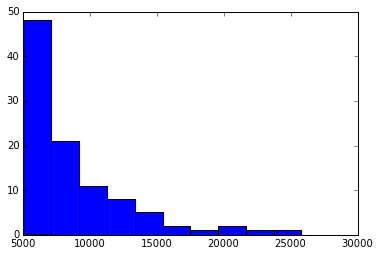

In [16]:
words_describe=map(lambda x : x[0], most_describe_words)
counts_describe=map(lambda x : x[1], most_describe_words)
plt.hist(counts_describe)

In [17]:
#check search words
search_term_words=train_prod['search_term'].str.lower().str.split()
search_term_words[:5]


0          [angle, bracket]
1              [l, bracket]
2              [deck, over]
3      [rain, shower, head]
4    [shower, only, faucet]
dtype: object

In [18]:
#romve stopwords in search term
search_term_words_rmsw=search_term_words.apply(lambda x: [item for item in x if item not in sw])
search_term_words_rmsw[:5]

0        [angle, bracket]
1            [l, bracket]
2                  [deck]
3    [rain, shower, head]
4        [shower, faucet]
dtype: object

In [19]:
search_term_list=[]
for item in search_term_words_rmsw:
    search_term_list.extend(item)
len(search_term_list)

214974

In [20]:
from collections import Counter
cnt_search=Counter()
for item in search_term_list:
    cnt_search[item]+=1

In [21]:
#top 100 most common words in search term
most_search_words=cnt_search.most_common(100)
print most_search_words

[('door', 2679), ('light', 2021), ('wall', 1442), ('shower', 1429), ('white', 1354), ('wood', 1349), ('tile', 1338), ('paint', 1145), ('cabinet', 1061), ('outdoor', 1052), ('water', 1034), ('vanity', 977), ('kitchen', 969), ('bathroom', 963), ('doors', 960), ('gas', 925), ('led', 899), ('lights', 840), ('air', 839), ('ceiling', 805), ('sink', 801), ('1/2', 772), ('faucet', 772), ('kit', 770), ('floor', 766), ('saw', 736), ('fan', 729), ('black', 727), ('pipe', 725), ('steel', 710), ('window', 697), ('lighting', 691), ('electric', 669), ('metal', 658), ('glass', 624), ('patio', 602), ('heater', 596), ('toilet', 580), ('pvc', 580), ('wire', 568), ('fence', 548), ('cover', 531), ('drill', 527), ('bulb', 521), ('plastic', 521), ('tub', 499), ('base', 498), ('top', 495), ('storage', 489), ('range', 487), ('bay', 486), ('panel', 477), ('bronze', 474), ('vinyl', 471), ('battery', 461), ('post', 460), ('round', 455), ('cabinets', 442), ('filter', 437), ('1/4', 436), ('stainless', 435), ('table

In [22]:
words_search=map(lambda x : x[0], most_search_words)
counts_search=map(lambda x : x[1], most_search_words)

/Users/shutan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


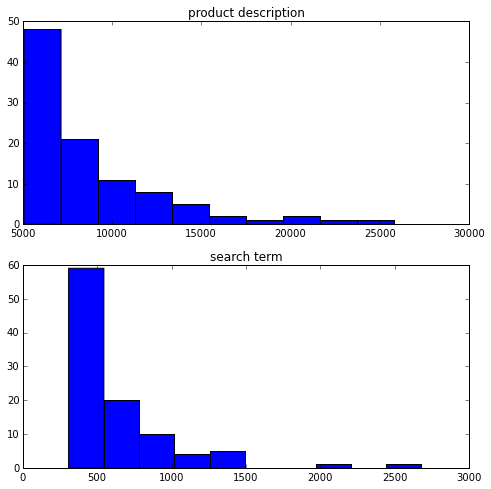

In [23]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(2,1,1)
ax1.hist(counts_describe)
ax1.set_title('product description')

ax2=fig.add_subplot(2,1,2)
ax2.hist(counts_search)
ax2.set_title('search term')

fig.show()

In [24]:
#co-occurrence matrix
words_describe = np.array(words_describe)
counts_describe = np.array(counts_describe)
describe = np.dstack((words_describe, counts_describe))
describe_df = pd.DataFrame(describe[0], columns=['word', 'count'])

In [25]:
words_search = np.array(words_search)
counts_search = np.array(counts_search)
search = np.dstack((words_search, counts_search))
search_df = pd.DataFrame(search[0], columns=['word', 'count'])

In [26]:
print describe_df[:5]
print search_df[:5]

           word  count
0         water  25801
1          door  21989
2         light  21230
3         steel  20081
4  installation  19146
     word count
0    door  2679
1   light  2021
2    wall  1442
3  shower  1429
4   white  1354


In [27]:
from collections import defaultdict
print train_prod.search_term.values

['angle bracket' 'l bracket' 'deck over' ...,
 'schlage lock siena half dummy knob with' 'zen garden  decor'
 'fine sheer curtain 63 inches']


In [28]:
top_search_words = search_df.word.values[:15] 
print top_search_words

['door' 'light' 'wall' 'shower' 'white' 'wood' 'tile' 'paint' 'cabinet'
 'outdoor' 'water' 'vanity' 'kitchen' 'bathroom' 'doors']


In [29]:
#top15 search term co-occurrence matrix
co_occur=defaultdict(lambda: defaultdict(int))
for item in train_prod.search_term.values:
    words = item.split()
    lst = filter(lambda x : x in top_search_words, words) 
    
    for elem1 in lst:
        for elem2 in lst:
            if elem1 == elem2:
                continue
            co_occur[elem1][elem2] += 1

In [30]:
co_pd = pd.DataFrame.from_dict(co_occur)
co_pd.fillna(0, inplace = True)
co_pd

,bathroom,cabinet,door,doors,kitchen,light,outdoor,paint,shower,tile,vanity,wall,water,white,wood
bathroom,0,21,16,0,0,91,0,0,10,0,173,24,0,22,1
cabinet,21,0,52,31,94,0,6,4,0,0,1,55,0,74,28
door,16,52,0,0,30,12,0,8,204,0,5,7,0,43,78
doors,0,31,0,0,0,0,0,4,78,0,0,0,0,20,22
kitchen,0,94,30,0,0,6,0,1,0,17,0,37,0,42,9
light,91,0,12,0,6,0,98,14,8,0,101,74,0,35,6
outdoor,0,6,0,0,0,98,0,0,0,0,0,84,9,30,1
paint,0,4,8,4,1,14,0,0,0,7,0,30,6,70,32
shower,10,0,204,78,0,8,0,0,0,39,0,10,0,8,0
tile,0,0,0,0,17,0,0,7,39,0,0,136,0,64,10


In [31]:
top_describe_words=describe_df.word.values[:15]
print top_describe_words

['water' 'door' 'light' 'steel' 'installation' 'designed' 'home' 'wood'
 'wall' '65' 'residents:' 'see&nbsp;proposition' 'protection' 'air'
 'construction']


In [32]:
#top15 description words co-occurrence matrix
co_occur2=defaultdict(lambda: defaultdict(int))
for item in train_prod.product_description.values:
    words = item.split()
    lst = filter(lambda x : x in top_describe_words, words) 
    
    for elem1 in lst:
        for elem2 in lst:
            if elem1 == elem2:
                continue
            co_occur2[elem1][elem2] += 1

In [33]:
co_pd2 = pd.DataFrame.from_dict(co_occur2)
co_pd2.fillna(0, inplace = True)
co_pd2

,65,air,construction,designed,door,home,installation,light,protection,residents:,steel,wall,water,wood
65,0,1165,2182,2109,4616,1938,2257,3345,1043,13719,3321,1332,4342,4938
air,1165,0,1406,3047,3114,3608,5027,2580,1041,1384,2103,2138,7932,695
construction,2182,1406,0,2298,6373,1544,3634,2356,960,2160,5269,1910,3406,3158
designed,2109,3047,2298,0,3492,1751,3550,3591,1065,2054,4628,2574,5644,2014
door,4616,3114,6373,3492,0,5800,8040,4170,1357,4607,8225,3823,6080,7344
home,1938,3608,1544,1751,5800,0,3367,4800,857,1981,2361,2309,6150,2700
installation,2257,5027,3634,3550,8040,3367,0,4968,970,2174,4362,6102,7547,3666
light,3345,2580,2356,3591,4170,4800,4968,0,1029,3181,2426,3670,1853,1748
protection,1043,1041,960,1065,1357,857,970,1029,0,1016,1234,494,1724,1866
residents:,13719,1384,2160,2054,4607,1981,2174,3181,1016,0,3280,1280,5193,4916


In [40]:
label=['door' ,'light', 'wall', 'shower' ,'white', 'wood', 'tile', 'paint', 'cabinet','outdoor' ,'water',
       'vanity', 'kitchen' ,'bathroom', 'doors']

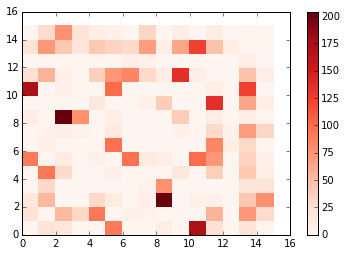

In [39]:

plt.pcolor(co_pd,cmap=plt.cm.Reds)
plt.colorbar()
plt.set_cmap
plt.show()

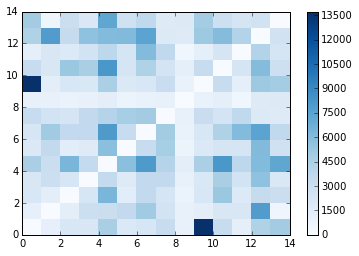

In [66]:
plt.pcolor(co_pd2,cmap=plt.cm.Blues)
plt.colorbar()
plt.set_cmap
plt.show()

In [45]:
#prod_desc_words_rmsw
#search_term_words_rmsw find excatly match
df_desc=pd.DataFrame(prod_desc_words_rmsw)
df_search=pd.DataFrame(search_term_words_rmsw)
print df_desc[:5]
print df_search[:5]

                                                   0
0  [angles, joints, stronger,, consistent,, strai...
1  [angles, joints, stronger,, consistent,, strai...
2  [behr, premium, textured, deckover, innovative...
3  [update, bathroom, delta, vero, single-handle,...
4  [update, bathroom, delta, vero, single-handle,...
                      0
0      [angle, bracket]
1          [l, bracket]
2                [deck]
3  [rain, shower, head]
4      [shower, faucet]
